In [190]:
import lightgbm as lgbm

import pandas as pd
import numpy as np

import sys, os

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from pandas_ml import ConfusionMatrix
import seaborn as sns
import matplotlib

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

In [205]:
np.random.seed(72)

In [206]:
def confusion(true,pred):
    confusion_matrix = ConfusionMatrix(true, pred)
    confusion_matrix.plot(normalized=True)
    plt.set_cmap('Greens')
    plt.rcParams.update({'font.size': 12})
    plt.title('Overall accuracy %.3f%%' % (100*accuracy_score(true, pred)))

### Import Data

In [227]:
df = pd.read_csv('features_clean.csv').iloc[:, 1:]

### Train Test Val Splits

In [228]:
X_train = df.iloc[:, 1:-1]
y_train = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)

### Random Forest Model

In [229]:
rf = RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=200)
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Overall accuracy', accuracy_score(y_pred, y_test))

Overall accuracy 0.7534770514603616


### Feature Importances

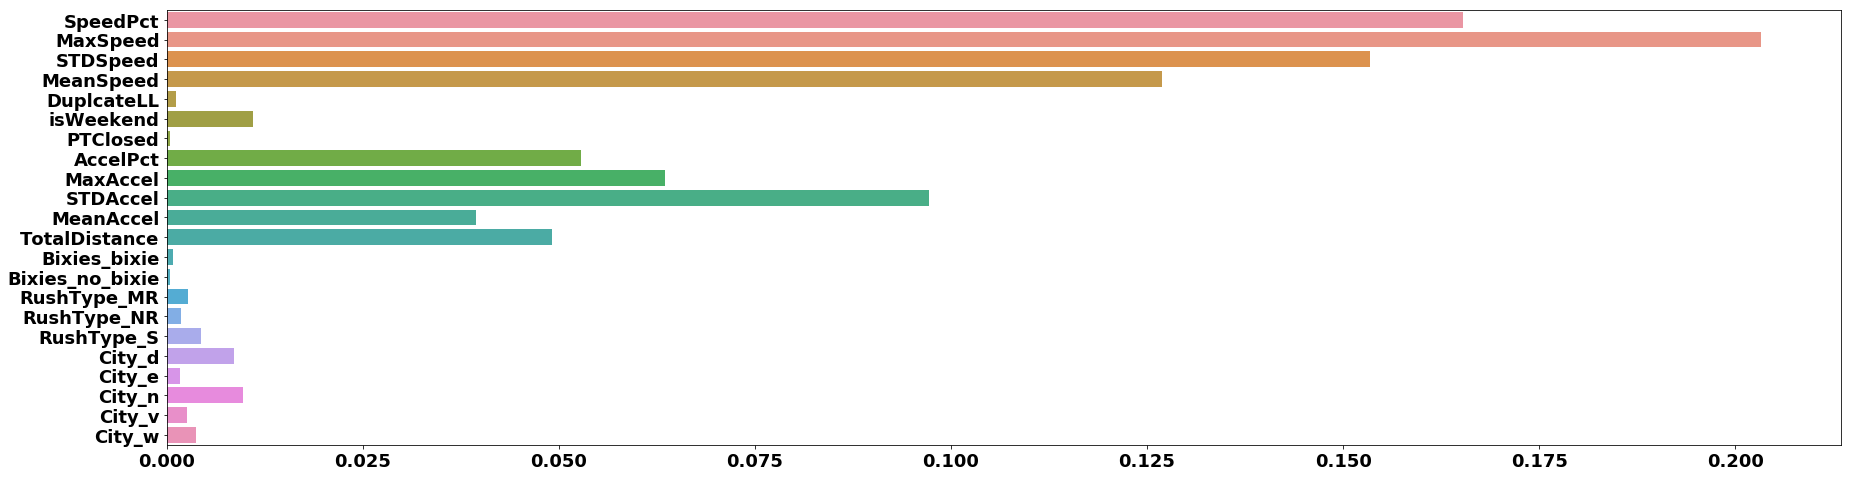

In [240]:
plt.figure(figsize=(30, 8))
sns.barplot(x=rf.feature_importances_, y=X_train.columns)
plt.savefig('figures/importances')

In [231]:
cols = df.Mode.unique()

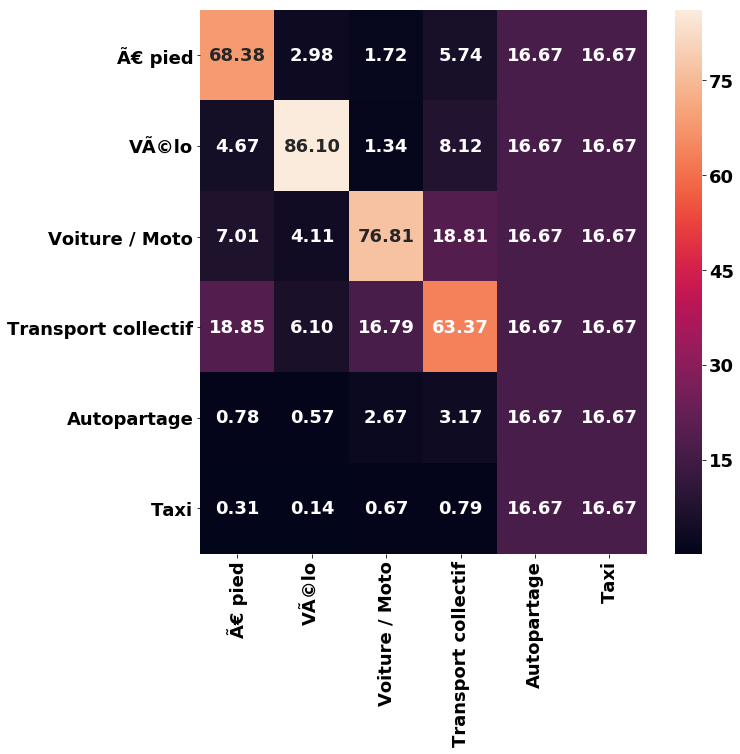

In [232]:
plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_test, y_pred, labels=cols)+1
cm = cm / cm.sum(axis=0)
cm = cm * 100
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=cols, yticklabels=cols)

### Green house Versus No Green House

In [233]:
df = pd.read_csv('features_clean_reduced.csv').iloc[:, :]

In [234]:
X_train = df.iloc[:, 1:-1]
y_train = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)

In [235]:
rf = RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=100)
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_pred, y_test)

0.868567454798331

### Feature Importances

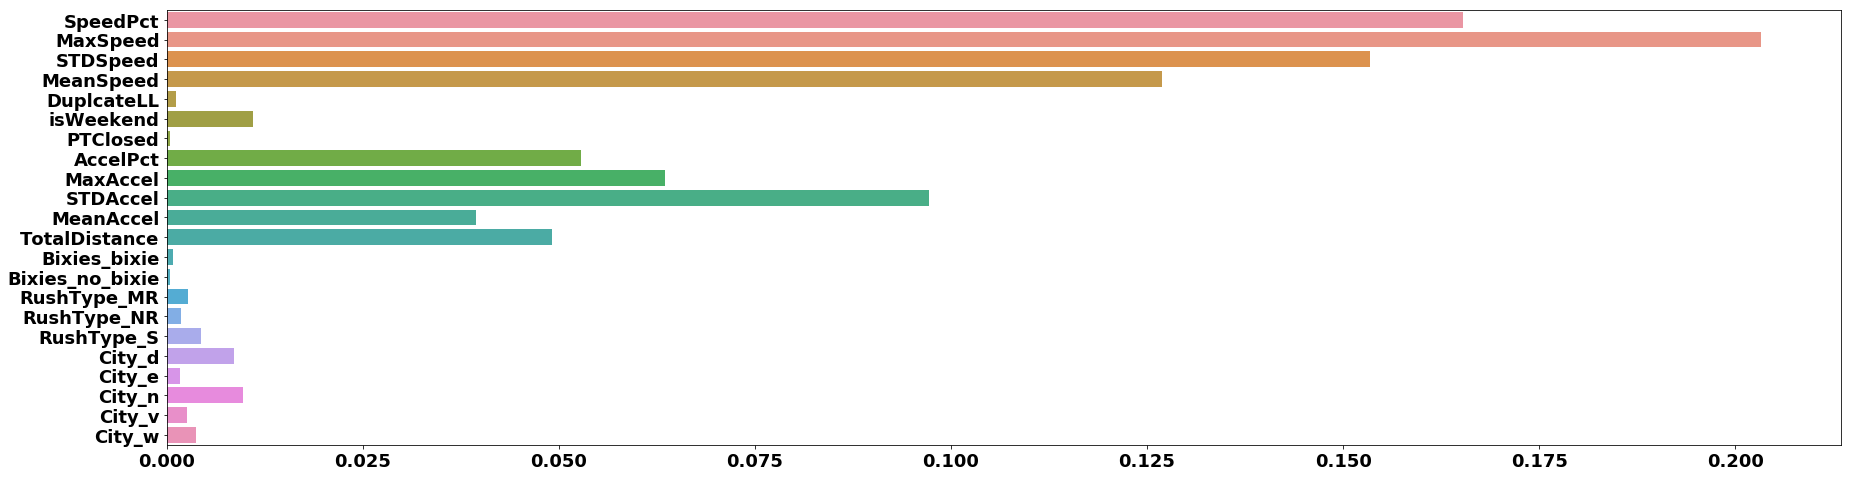

In [236]:
plt.figure(figsize=(30, 8))
sns.barplot(x=rf.feature_importances_, y=X_train.columns)

In [237]:
### Confusion Matrix

In [238]:
from sklearn.metrics import confusion_matrix

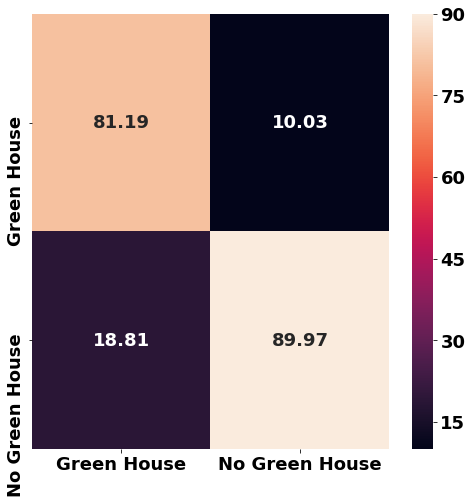

In [239]:
plt.figure(figsize=(8, 8))
cm = confusion_matrix(y_pred, y_test)
cm = cm / cm.sum(axis=0)
cm = cm * 100
sns.heatmap(cm, annot=True, fmt='.2f', yticklabels=np.unique(y_pred), xticklabels=np.unique(y_pred))